In [1]:
import os

%matplotlib inline
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.naive_bayes import MultinomialNB
from collections import Counter
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.svm import SVC

In [2]:
ipl =pd.read_csv("Matches.txt")
d = pd.read_csv("deliveries.csv")

In [3]:
ipl.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
d.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

In [6]:
ipl['season']=ipl['season'].astype('category')

In [7]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   id               636 non-null    int64   
 1   season           636 non-null    category
 2   city             629 non-null    object  
 3   date             636 non-null    object  
 4   team1            636 non-null    object  
 5   team2            636 non-null    object  
 6   toss_winner      636 non-null    object  
 7   toss_decision    636 non-null    object  
 8   result           636 non-null    object  
 9   dl_applied       636 non-null    int64   
 10  winner           633 non-null    object  
 11  win_by_runs      636 non-null    int64   
 12  win_by_wickets   636 non-null    int64   
 13  player_of_match  633 non-null    object  
 14  venue            636 non-null    object  
 15  umpire1          635 non-null    object  
 16  umpire2          635 non-null    object  
 1

## Q) find the venue in which highest number of matches were held 

In [8]:
venue = ipl.groupby("venue")
venue.size().sort_values().reset_index().tail(1)

,venue,0
34,M Chinnaswamy Stadium,66


## Q) Find the team winning most number of matches since 2008

In [9]:
ipl['winner'].value_counts().sort_values().tail(1)

Mumbai Indians    92
Name: winner, dtype: int64

## Q) Find the team winning least number of matches

In [10]:
ipl["winner"].value_counts().sort_values().head(1).index[0]

'Rising Pune Supergiants'

## Q) List out all team names since 2008

In [11]:
(ipl['team2'].value_counts() + ipl['team1'].value_counts()).drop_duplicates().index[::1]

Index(['Chennai Super Kings', 'Deccan Chargers', 'Delhi Daredevils',
       'Gujarat Lions', 'Kings XI Punjab', 'Kochi Tuskers Kerala',
       'Mumbai Indians', 'Pune Warriors', 'Rajasthan Royals',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad'],
      dtype='object')

<AxesSubplot:>

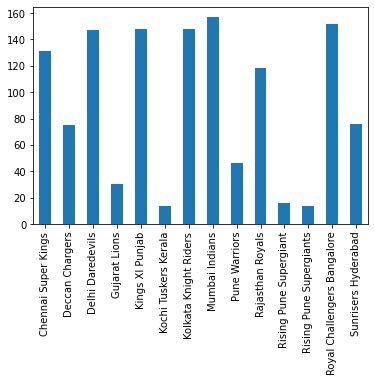

In [12]:
#plot bar graph for the teams and their number of matches played
(ipl['team2'].value_counts() + ipl['team1'].value_counts()).plot.bar()

## Q) Find the team who played most number of matches. note down winning doesnt matter

In [13]:
(ipl['team2'].value_counts() + ipl['team1'].value_counts()).sort_values().tail(1)

Mumbai Indians    157
dtype: int64

## Q) List out each seasons winners.
logic is that each seasons last match is the final match and its winner is the seasons winner 

In [14]:
x=ipl.drop_duplicates('season',keep='last')
x[['season','winner']].sort_values('season')

,season,winner
116,2008,Rajasthan Royals
173,2009,Deccan Chargers
233,2010,Chennai Super Kings
306,2011,Chennai Super Kings
380,2012,Kolkata Knight Riders
456,2013,Mumbai Indians
516,2014,Kolkata Knight Riders
575,2015,Mumbai Indians
635,2016,Sunrisers Hyderabad
58,2017,Mumbai Indians


## Q) how many times each team has won the finals

In [15]:
x["winner"].value_counts().reset_index()

,index,winner
0,Mumbai Indians,3
1,Chennai Super Kings,2
2,Kolkata Knight Riders,2
3,Rajasthan Royals,1
4,Deccan Chargers,1
5,Sunrisers Hyderabad,1


In [16]:
ipl.head(10)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
7,8,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


# Q)Find out whether the toss winner of the game has actually won the game by his decision to bat or field first?

In [17]:
toss_data = ipl[["season","city","venue","toss_winner","toss_decision","winner"]].copy()

In [18]:
toss_data.head(10)

,season,city,venue,toss_winner,toss_decision,winner
0,2017,Hyderabad,"Rajiv Gandhi International Stadium, Uppal",Royal Challengers Bangalore,field,Sunrisers Hyderabad
1,2017,Pune,Maharashtra Cricket Association Stadium,Rising Pune Supergiant,field,Rising Pune Supergiant
2,2017,Rajkot,Saurashtra Cricket Association Stadium,Kolkata Knight Riders,field,Kolkata Knight Riders
3,2017,Indore,Holkar Cricket Stadium,Kings XI Punjab,field,Kings XI Punjab
4,2017,Bangalore,M Chinnaswamy Stadium,Royal Challengers Bangalore,bat,Royal Challengers Bangalore
5,2017,Hyderabad,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,field,Sunrisers Hyderabad
6,2017,Mumbai,Wankhede Stadium,Mumbai Indians,field,Mumbai Indians
7,2017,Indore,Holkar Cricket Stadium,Royal Challengers Bangalore,bat,Kings XI Punjab
8,2017,Pune,Maharashtra Cricket Association Stadium,Rising Pune Supergiant,field,Delhi Daredevils
9,2017,Mumbai,Wankhede Stadium,Mumbai Indians,field,Mumbai Indians


In [19]:
toss_data['toss_with_bat']=""
toss_data['toss_with_field']=""

In [20]:
d1 = toss_data['toss_winner']==toss_data['winner']

In [21]:
toss_data = toss_data[d1].sort_values('toss_winner')

In [22]:
def findValues_for_bat(toss_decision):
    if toss_decision=='bat':
        return 'yes'
    else:
        return 'no'
def findValues_for_field(toss_decision):
    if toss_decision=='field':
        return 'yes'
    else:
        return 'no'

In [23]:
toss_data['toss_with_bat']=toss_data['toss_decision'].apply(findValues_for_bat)
toss_data['toss_with_field']=toss_data['toss_decision'].apply(findValues_for_field)

In [24]:
toss_data.head(10)

,season,city,venue,toss_winner,toss_decision,winner,toss_with_bat,toss_with_field
520,2015,Chennai,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,bat,Chennai Super Kings,yes,no
181,2010,Kolkata,Eden Gardens,Chennai Super Kings,bat,Chennai Super Kings,yes,no
445,2013,Chennai,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,bat,Chennai Super Kings,yes,no
60,2008,Chandigarh,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,Chennai Super Kings,yes,no
303,2011,Mumbai,Wankhede Stadium,Chennai Super Kings,field,Chennai Super Kings,no,yes
424,2013,Chennai,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,bat,Chennai Super Kings,yes,no
306,2011,Chennai,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,bat,Chennai Super Kings,yes,no
421,2013,Pune,Subrata Roy Sahara Stadium,Chennai Super Kings,bat,Chennai Super Kings,yes,no
86,2008,Delhi,Feroz Shah Kotla,Chennai Super Kings,field,Chennai Super Kings,no,yes
541,2015,Chennai,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,bat,Chennai Super Kings,yes,no


In [25]:
toss_data=toss_data.rename(columns={'toss_with_bat':'bat first','toss_with_field':'field first'})
toss_data.head(10)

,season,city,venue,toss_winner,toss_decision,winner,bat first,field first
520,2015,Chennai,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,bat,Chennai Super Kings,yes,no
181,2010,Kolkata,Eden Gardens,Chennai Super Kings,bat,Chennai Super Kings,yes,no
445,2013,Chennai,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,bat,Chennai Super Kings,yes,no
60,2008,Chandigarh,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,Chennai Super Kings,yes,no
303,2011,Mumbai,Wankhede Stadium,Chennai Super Kings,field,Chennai Super Kings,no,yes
424,2013,Chennai,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,bat,Chennai Super Kings,yes,no
306,2011,Chennai,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,bat,Chennai Super Kings,yes,no
421,2013,Pune,Subrata Roy Sahara Stadium,Chennai Super Kings,bat,Chennai Super Kings,yes,no
86,2008,Delhi,Feroz Shah Kotla,Chennai Super Kings,field,Chennai Super Kings,no,yes
541,2015,Chennai,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,bat,Chennai Super Kings,yes,no


In [26]:
 t = toss_data.groupby(['season','toss_winner','bat first'],sort=True)

In [27]:
t.size().head(15)


season  toss_winner            bat first
2008    Chennai Super Kings    no           1
                               yes          2
        Deccan Chargers        no           2
                               yes          0
        Delhi Daredevils       no           2
                               yes          0
        Gujarat Lions          no           0
                               yes          0
        Kings XI Punjab        no           3
                               yes          1
        Kochi Tuskers Kerala   no           0
                               yes          0
        Kolkata Knight Riders  no           0
                               yes          3
        Mumbai Indians         no           4
dtype: int64

In [28]:
t.describe()

city                          \
                                             count unique         top freq   
season toss_winner                 bat first                                 
2008   Chennai Super Kings         no            1      1       Delhi    1   
                                   yes           2      2  Chandigarh    1   
       Deccan Chargers             no            2      2      Mumbai    1   
       Delhi Daredevils            no            2      2   Bangalore    1   
       Kings XI Punjab             no            3      3  Chandigarh    1   
...                                            ...    ...         ...  ...   
2017   Mumbai Indians              yes           1      1   Hyderabad    1   
       Rising Pune Supergiant      no            5      2        Pune    4   
       Royal Challengers Bangalore yes           2      2       Delhi    1   
       Sunrisers Hyderabad         no            2      2   Hyderabad    1   
                                   yes           1      1   Hyderabad    1   

                                             venue         \
                                             count unique   
season toss_winner                 bat first                
2008   Chennai Super Kings         no            1      1   
                                   yes           2      2   
       Deccan Chargers             no            2      2   
       Delhi Daredevils            no            2      2   
       Kings XI Punjab             no            3      3   
...                                            ...    ...   
2017   Mumbai Indians              yes           1      1   
       Rising Pune Supergiant      no            5      2   
       Royal Challengers Bangalore yes           2      2   
       Sunrisers Hyderabad         no            2      2   
                                   yes           1      1   

                                                                                          \
                                                                                     top   
season toss_winner                 bat first                                               
2008   Chennai Super Kings         no                                   Feroz Shah Kotla   
                                   yes        Punjab Cricket Association Stadium, Mohali   
       Deccan Chargers             no                         Dr DY Patil Sports Academy   
       Delhi Daredevils            no                              M Chinnaswamy Stadium   
       Kings XI Punjab             no         Punjab Cricket Association Stadium, Mohali   
...                                                                                  ...   
2017   Mumbai Indians              yes         Rajiv Gandhi International Stadium, Uppal   
       Rising Pune Supergiant      no            Maharashtra Cricket Association Stadium   
       Royal Challengers Bangalore yes                                  Feroz Shah Kotla   
       Sunrisers Hyderabad         no          Rajiv Gandhi International Stadium, Uppal   
                                   yes         Rajiv Gandhi International Stadium, Uppal   

                                                  toss_decision                \
                                             freq         count unique    top   
season toss_winner                 bat first                                    
2008   Chennai Super Kings         no           1             1      1  field   
                                   yes          1             2      1    bat   
       Deccan Chargers             no           1             2      1  field   
       Delhi Daredevils            no           1             2      1  field   
       Kings XI Punjab             no           1             3      1  field   
...                                           ...           ...    ...    ...   
2017   Mumbai Indians              yes          1             1      1    bat   

# DAY 6

In [29]:
delivery = pd.read_csv('deliveries.csv')

In [30]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          150460 non-null  int64 
 1   inning            150460 non-null  int64 
 2   batting_team      150460 non-null  object
 3   bowling_team      150460 non-null  object
 4   over              150460 non-null  int64 
 5   ball              150460 non-null  int64 
 6   batsman           150460 non-null  object
 7   non_striker       150460 non-null  object
 8   bowler            150460 non-null  object
 9   is_super_over     150460 non-null  int64 
 10  wide_runs         150460 non-null  int64 
 11  bye_runs          150460 non-null  int64 
 12  legbye_runs       150460 non-null  int64 
 13  noball_runs       150460 non-null  int64 
 14  penalty_runs      150460 non-null  int64 
 15  batsman_runs      150460 non-null  int64 
 16  extra_runs        150460 non-null  int

In [31]:
delivery.shape

(150460, 21)

In [32]:
delivery.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [33]:
delivery.head(10)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
5,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,6,S Dhawan,DA Warner,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
6,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,7,S Dhawan,DA Warner,TS Mills,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
7,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,1,S Dhawan,DA Warner,A Choudhary,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
8,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,2,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
9,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,3,DA Warner,S Dhawan,A Choudhary,0,...,0,0,1,0,0,1,1,NaN,NaN,NaN


## Q) top 5 batsman in ipl according to most number of runs?

In [34]:
top_batman=delivery.groupby(['batsman'])['batsman_runs'].sum()

In [35]:
top_batman.sort_values(ascending=False).head(5)

batsman
SK Raina     4548
V Kohli      4423
RG Sharma    4207
G Gambhir    4132
DA Warner    4014
Name: batsman_runs, dtype: int64

## Q) which batsman has played most number of balls

In [36]:
t=delivery.groupby(['batsman'])

In [37]:
t['batsman_runs'].count().sort_values(ascending=False).head(5) 

# btw logicl is each row is the run on ball

batsman
V Kohli      3494
G Gambhir    3433
SK Raina     3369
RG Sharma    3274
S Dhawan     3005
Name: batsman_runs, dtype: int64

## Q) which batsman has hit highest number of 4s

In [38]:
mask = delivery["batsman_runs"] == 4

In [39]:
delivery_fours = delivery[mask].groupby('batsman')['batsman_runs'].count().sort_values(ascending=False)
# count() instead of sum() because we need to count the number of 4s instead of summing the total runs gained by hitting a boundary

In [40]:
delivery_fours.head(5)

batsman
G Gambhir    484
SK Raina     402
DA Warner    401
S Dhawan     401
V Kohli      384
Name: batsman_runs, dtype: int64

## Q) how many total fours in ipl till now

In [41]:
len(delivery[mask])

17033

## Q) Which batsman has hit highest number of 6s

In [42]:
mask = delivery["batsman_runs"]  == 6

In [43]:
delivery_six = delivery[mask].groupby("batsman")["batsman_runs"].count().sort_values(ascending = False)

In [44]:
delivery_six.head(5)

batsman
CH Gayle     266
SK Raina     174
RG Sharma    173
V Kohli      160
DA Warner    160
Name: batsman_runs, dtype: int64

##  Q) How many total sixs in ipl till now 

In [45]:
len(delivery[mask])

6523

## Q) which bowler has given most no. of dot balls

In [46]:
mask = delivery["total_runs"] == 0

In [47]:
delivery_dot = delivery[mask]

In [48]:
delivery_dot.groupby("bowler")["total_runs"].count().sort_values(ascending = False).head(5)

bowler
P Kumar            1075
Harbhajan Singh    1062
SL Malinga         1060
DW Steyn            978
A Mishra            953
Name: total_runs, dtype: int64

## Q) batsman which when on non-striker end, there has been most dismissals

* Case 1: Only the striker is dismissed everytime
* Case 2: The striker and non-striker both can be dismissed
* Sir's version runs for case 1 and 2 both and my version runs only for case 1.

In [49]:
#My version - only works for case 1
delivery_dismissal1 = delivery.dropna(subset=['player_dismissed'])
mask=delivery_dismissal1['batsman']==delivery_dismissal1['player_dismissed']
delivery_dismissal1 = delivery_dismissal1[mask]
ans=delivery_dismissal1.groupby('non_striker')['player_dismissed'].count().sort_values(ascending=False).head().reset_index()
#delivery_dismissal1.shape
ans

,non_striker,player_dismissed
0,RG Sharma,170
1,V Kohli,150
2,SK Raina,138
3,G Gambhir,135
4,RV Uthappa,134


In [50]:
#Sirs version - works for both the cases but actually the question asked just for case 1
delivery_dismissal2 = delivery.fillna({'player_dismissed':'Not'})
mask=delivery_dismissal2['player_dismissed']!='Not'
#mask1=delivery_dismissal2['player_dismissed']!=delivery_dismissal2['non_striker']
#delivery_dismissal2 = delivery_dismissal2[mask & mask1]
delivery_dismissal2 = delivery_dismissal2[mask]
ans1=delivery_dismissal2.groupby('non_striker')['player_dismissed'].count().sort_values(ascending=False).head(10).reset_index()
#delivery_dismissal2.shape
ans1

,non_striker,player_dismissed
0,RG Sharma,171
1,V Kohli,151
2,SK Raina,145
3,G Gambhir,142
4,RV Uthappa,138
5,KD Karthik,125
6,MS Dhoni,120
7,AB de Villiers,120
8,S Dhawan,116
9,DA Warner,112


###  Below cell is the proof by showing that RG Sharma has been out being on non_strikers end just one time
* Comparing sir's and my version and according to the question that is:- count the number of times batsman on strikers end got out while a particular batsman was on the non-strikers end.
### My version seems to be correct

In [51]:
#Finding the cases when the non-striker was the player_dismissed
dell = delivery.dropna(subset=['player_dismissed'])
mask = dell['non_striker']==dell['player_dismissed']
mask1 = dell['non_striker']=='RG Sharma'
dell = dell[mask & mask1]
dell.groupby('non_striker')['player_dismissed'].count().sort_values(ascending=False).head(10).reset_index()

,non_striker,player_dismissed
0,RG Sharma,1


* 7084+354  means sirs version din take into account that non-striker can also get dismissed 

## Q) make a function with one argument:- batsman name and return the name of the team that batsman has hit most runs against

In [72]:
# Finding the batsmans and the team they have hit most number of runs against
hit_runs = delivery.groupby(["bowling_team","batsman"])["batsman_runs"].sum().sort_values(ascending=False).reset_index().drop_duplicates(subset=['bowling_team'],keep="first")
hit_runs

,bowling_team,batsman,batsman_runs
0,Kings XI Punjab,CH Gayle,797
1,Kolkata Knight Riders,RG Sharma,710
2,Mumbai Indians,SK Raina,708
3,Chennai Super Kings,V Kohli,706
8,Delhi Daredevils,RG Sharma,670
11,Royal Challengers Bangalore,G Gambhir,644
31,Rajasthan Royals,AB de Villiers,485
50,Sunrisers Hyderabad,V Kohli,439
76,Pune Warriors,CH Gayle,383
99,Deccan Chargers,R Dravid,339


In [73]:
# Finding virat has hit most runs against which team
mask=delivery['batsman']=='V Kohli'
bats = delivery[mask]
bats.groupby('bowling_team')['batsman_runs'].sum().sort_values(ascending=False).index[0]

'Chennai Super Kings'

In [74]:
def opp_team_most_runs(batsman_name):
    mask=delivery['batsman']==batsman_name
    bats = delivery[mask]
    ans=bats.groupby('bowling_team')['batsman_runs'].sum().sort_values(ascending=False).index[0]
    return ans

In [75]:
opp_team_most_runs('RG Sharma')

'Kolkata Knight Riders'

# Q) make a function which takes one argument:- batsman and return which bowler has givn highest number of runs to that batsman

In [76]:
mask=delivery['batsman']=='V Kohli'
bats = delivery[mask]
bats.groupby('bowler')['batsman_runs'].sum().sort_values(ascending=False).head()

bowler
A Mishra     149
UT Yadav     141
DJ Bravo     130
R Ashwin     127
RA Jadeja    104
Name: batsman_runs, dtype: int64

In [77]:
def most_runs_taken_from_bowler(batsman_name):
    mask=delivery['batsman']==batsman_name
    bats = delivery[mask]
    return bats.groupby('bowler')['batsman_runs'].sum().sort_values(ascending=False).index[0]

In [79]:
most_runs_taken_from_bowler("V Kohli")

'A Mishra'

# Q) in each over which team has hit how many sixes.

In [80]:
# Pivot_table method
sixes = delivery[delivery['batsman_runs']==6]
y=sixes.pivot_table(index=['batting_team'],columns=['over'],values='batsman_runs',aggfunc='count')
print(y)

over                           1     2     3     4     5     6     7     8   \
batting_team                                                                  
Chennai Super Kings           5.0  17.0  37.0  34.0  41.0  43.0  22.0  25.0   
Deccan Chargers               3.0  21.0  11.0  17.0  27.0  22.0  11.0  13.0   
Delhi Daredevils             14.0  19.0  30.0  41.0  29.0  27.0  20.0  26.0   
Gujarat Lions                 4.0   6.0  14.0   9.0  11.0  12.0  10.0   6.0   
Kings XI Punjab              10.0  19.0  27.0  36.0  30.0  39.0  19.0  35.0   
Kochi Tuskers Kerala          2.0   4.0   3.0   3.0   3.0   3.0   2.0   2.0   
Kolkata Knight Riders        10.0  13.0  28.0  35.0  25.0  34.0  26.0  25.0   
Mumbai Indians                9.0  17.0  22.0  28.0  43.0  50.0  18.0  23.0   
Pune Warriors                 5.0   6.0   6.0   7.0   7.0   3.0   5.0  10.0   
Rajasthan Royals             12.0   7.0  13.0  21.0  23.0  24.0  15.0  24.0   
Rising Pune Supergiant        1.0   NaN   2.0   5.0 

In [81]:
# Groupby method
sixes.groupby(['batting_team','over'])['batsman_runs'].count().head(10)

batting_team         over
Chennai Super Kings  1        5
                     2       17
                     3       37
                     4       34
                     5       41
                     6       43
                     7       22
                     8       25
                     9       23
                     10      23
Name: batsman_runs, dtype: int64

In [82]:
import seaborn as sns

<AxesSubplot:xlabel='over', ylabel='batting_team'>

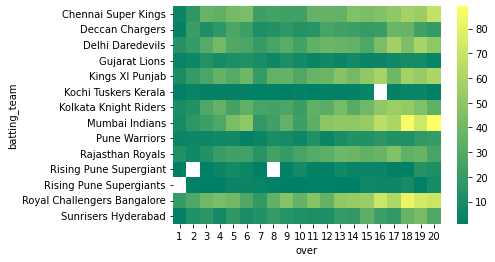

In [83]:
sns.heatmap(y,cmap='summer')

## Q) find the orange cap holders of each season

In [84]:
merged_data = ipl.merge(delivery,left_on='id',right_on='match_id')

In [85]:
merged_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [86]:
df = merged_data.groupby(['season','batsman'])['batsman_runs'].sum().reset_index()

In [87]:
df.sort_values('batsman_runs').drop_duplicates(subset=['season'],keep='last').sort_values('season')

,season,batsman,batsman_runs
372,2008,SE Marsh,616
712,2009,ML Hayden,572
1311,2010,SR Tendulkar,618
1468,2011,CH Gayle,608
1929,2012,CH Gayle,733
2547,2013,MEK Hussey,733
3106,2014,RV Uthappa,660
3330,2015,DA Warner,562
4119,2016,V Kohli,973
4252,2017,DA Warner,641


# For sir's methods of solving the below three questions, goto the last of the notebook under heading DAY 7
* H/W
* Q1) last 5 overs (death overs) mein sabse dangerous batsman, strike rate (no. of runs divided by number of balls)*100.
base criteria is player has played 200 balls, (between 16 and 20 overs he has completed 200 balls)

In [89]:
mask = merged_data['over']>15

In [90]:

# Only for death overs that is from 16-20 both inclusive
danger = merged_data[mask]
danger.head(10)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
93,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
94,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,MC Henriques,caught,Sachin Baby
95,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
96,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
97,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
98,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
99,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
100,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
101,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
102,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [91]:
# Finding each batsmans total runs in history in death overs
runs = danger.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).reset_index()
runs.head(10)

,batsman,batsman_runs
0,MS Dhoni,2076
1,KA Pollard,1352
2,RG Sharma,1314
3,AB de Villiers,1203
4,V Kohli,993
5,YK Pathan,930
6,Yuvraj Singh,883
7,JP Duminy,869
8,SK Raina,767
9,RA Jadeja,753


In [92]:
# Finding number of balls played by each batsman in death overs
balls = danger.groupby('batsman')['ball'].count().sort_values(ascending=False).reset_index()
balls.head(10)

,batsman,ball
0,MS Dhoni,1224
1,KA Pollard,838
2,RG Sharma,748
3,YK Pathan,584
4,RA Jadeja,576
5,AB de Villiers,570
6,V Kohli,546
7,JP Duminy,518
8,Yuvraj Singh,516
9,IK Pathan,465


In [93]:
# Merging runs and ball values in a single dataframe for simplicity
balls_and_runs = balls.merge(runs,left_on='batsman',right_on='batsman')

In [94]:
balls_and_runs = balls_and_runs[balls_and_runs['ball']>=200]
len(balls_and_runs)

44

In [95]:
balls_and_runs['strike']=0

In [96]:
balls_and_runs['strike']=(balls_and_runs['batsman_runs']/balls_and_runs['ball'])*100
balls_and_runs.sort_values('strike',ascending=False).head(2)

,batsman,ball,batsman_runs,strike
5,AB de Villiers,570,1203,211.052632
38,DA Warner,228,432,189.473684


## Q2) top 10 batsman, and top 10 bowlers with max number of wickets and combine them and make a heatmap which tells which top batsman has hitten most runs against a top bowler.

In [101]:
top_batsman=delivery.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10).index.tolist()
#Finding the top 10 batsman and storing the names in a list using index.tolist() function

In [102]:
top_batsman

['SK Raina',
 'V Kohli',
 'RG Sharma',
 'G Gambhir',
 'DA Warner',
 'RV Uthappa',
 'CH Gayle',
 'S Dhawan',
 'MS Dhoni',
 'AB de Villiers']

In [103]:
delivery['dismissal_kind'].value_counts()

caught                   4373
bowled                   1382
run out                   755
lbw                       455
stumped                   243
caught and bowled         211
retired hurt                9
hit wicket                  9
obstructing the field       1
Name: dismissal_kind, dtype: int64

In [104]:
dismissal=['caught','bowled','lbw','stumped','caught and bowled','hit wicket']
#only in these cases the wicket credit is given to bowler

In [105]:
out=delivery[delivery['dismissal_kind'].isin(dismissal)]
#Filtering out batsman who got out by the above ways

In [106]:
bowler=out.groupby('bowler')['dismissal_kind'].count().sort_values(ascending=False).head(10).index.tolist()
#Taking out list of top 10 bowlers having most wickets

In [107]:
len(out)

6673

In [108]:
batsmandf=delivery[delivery['batsman'].isin(top_batsman)]
# fitlering out top10 batsman and storing in new variable 

In [109]:
finaldf=batsmandf[batsmandf['bowler'].isin(bowler)]
# filtering out batsmans who faced the top10 batsmans

In [110]:
finaldf.shape

(4625, 21)

<AxesSubplot:xlabel='batsman', ylabel='bowler'>

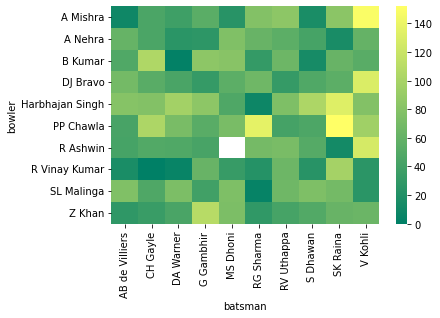

In [111]:
y=finaldf.pivot_table(index='bowler',columns='batsman',values='batsman_runs',aggfunc='sum')
sns.heatmap(y,cmap='summer')

# Q3) most economical bowler in death overs
* Economy rate = runs conceeded / overs bowled
* Example if a bowler has given 35 runs in 3.1 overs
* so his overs bowled will be calculated as 3+1/6 = 3.1666
* Economy rate would be 35/3.166 = 11.054

In [112]:
do=delivery[delivery['over']>15]
#we only need overs between 16 to 20 overs

In [113]:
len(do)

33737

In [114]:
a=do.groupby('bowler')['total_runs'].count() #Finding number of balls bowled by each bowler
a.sort_values(ascending=False)

bowler
SL Malinga         1050
DJ Bravo            885
B Kumar             715
R Vinay Kumar       673
SP Narine           664
                   ... 
SPD Smith             2
Ankit Soni            1
JM Kemp               1
AA Jhunjhunwala       1
AC Gilchrist          1
Name: total_runs, Length: 302, dtype: int64

In [115]:
b=do.groupby('bowler')['total_runs'].count()>100 #Only need bowlers who bowled more than 100 balls

In [116]:
bowler=a[b].index.tolist() # storing bowler names in a list

In [117]:
newdf=delivery[delivery['bowler'].isin(bowler)]

In [118]:
newdf.shape

(110789, 21)

In [119]:
run=newdf.groupby('bowler')['total_runs'].sum()

In [120]:
balls=newdf.groupby('bowler')['total_runs'].count()

In [121]:
balls=balls/6

In [122]:
(run/balls).sort_values().head

<bound method NDFrame.head of bowler
Sohail Tanvir     6.226415
SP Narine         6.395706
R Ashwin          6.490886
DW Steyn          6.600278
A Kumble          6.646999
                    ...   
Anureet Singh     8.778325
VRV Singh         8.878706
A Ashish Reddy    8.888889
JR Hopes          9.138211
Basil Thampi      9.237410
Name: total_runs, Length: 97, dtype: float64>

# Compare batsman and bowler:

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [53]:
pd.set_option('display.max_columns',100)

In [54]:
data=pd.read_csv('deliveries.csv')
ipl=pd.read_csv('matches.txt')
merged=ipl.merge(data,left_on='id',right_on='match_id')

In [55]:
merged.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'match_id', 'inning', 'batting_team', 'bowling_team', 'over',
       'ball', 'batsman', 'non_striker', 'bowler', 'is_super_over',
       'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In the below cells, before main function heading. I am finding z scores of players

## Batsmen (20 Overs)

In [56]:
total_runs = merged.groupby("batsman")["batsman_runs"].sum().reset_index()

In [57]:
balls_played = merged.groupby("batsman")["batsman_runs"].count().reset_index()

In [58]:
runs_balls_played_whole = total_runs.merge(balls_played,on="batsman")

In [59]:
runs_balls_played_whole.rename(columns={"batsman_runs_y":"ball_played","batsman_runs_x":"runs"},inplace=True)
runs_balls_played_whole["strike"] = (runs_balls_played_whole["runs"]/runs_balls_played_whole["ball_played"])*100
runs_balls_played_whole = runs_balls_played_whole[runs_balls_played_whole["ball_played"]>=200]

In [60]:
runs_balls_played_whole.sort_values("strike",ascending=False).head()

,batsman,runs,ball_played,strike
30,AD Russell,574,350,164.000000
86,CH Morris,439,275,159.636364
143,GJ Maxwell,1229,780,157.564103
196,KH Pandya,480,313,153.354633
433,V Sehwag,2728,1833,148.827059


# Bolwers (20 Overs)

In [66]:
bowlers = merged.copy()
dismissal = ["caught","bowled","ibw","stumped","caught and bowled",'hit wicket']
total_wickets = bolwers[bolwers["dismissal_kind"].isin(dismissal)]


In [67]:
total_wickets = total_wickets.groupby("bowler")["player_dismissed"].count().sort_values(ascending=False).reset_index()
total_wickets.rename(columns={"player_dismissed":"wickets"},inplace=True)

In [68]:
runs_given = bolwers.groupby("bowler")["total_runs"].sum().reset_index()
runs_given.rename(columns={"total_runs":"runs"},inplace=True)

In [69]:

balls_bowled=bowlers.groupby('bowler')['total_runs'].count().reset_index()
balls_bowled.rename(columns={'total_runs':'balls_bowled'},inplace=True)

In [70]:
bowler_statistics_whole = total_wickets.merge(runs_given,on="bowler")
bowler_statistics_whole = bowler_statistics_whole.merge(balls_bowled,on="bowler")

In [71]:
bowler_statistics_whole['econ']=100-(bowler_statistics_whole['runs']/(bowler_statistics_whole['balls_bowled']/6))

In [72]:
bowler_statistics_whole = bowler_statistics_whole[bowler_statistics_whole["balls_bowled"]>=200]

In [73]:
mean_bowl_whole = bowler_statistics_whole["econ"].mean()

In [74]:
std_bowl_whole = bowler_statistics_whole["econ"].std()

In [75]:
bowler_statistics_whole['z']=(bowler_statistics_whole['econ']-mean_bowl_whole)/std_bowl_whole

In [76]:
bowler_statistics_whole.sort_values('econ',ascending=False).head()

,bowler,wickets,runs,balls_bowled,econ,z
92,Sohail Tanvir,19,275,265,93.773585,2.391285
139,A Chandila,11,245,234,93.717949,2.309710
16,SP Narine,83,2085,1956,93.604294,2.143068
9,R Ashwin,90,2552,2359,93.509114,2.003512
147,SM Pollock,10,307,280,93.421429,1.874946


# Top 10 batsman in Dangerous Overs (16 to 20 overs)

In [83]:
mask = merged["over"]> 15
danger = merged[mask]


In [88]:
total_runs_danger = danger.groupby("batsman")["batsman_runs"].sum().reset_index()
total_runs_danger.rename(columns={'batsman_runs':'runs'},inplace=True)

In [90]:
total_balls_danger = danger.groupby("batsman")["batsman_runs"].count().reset_index()
total_balls_danger.rename(columns={"batsman_runs":"balls"},inplace=True)

In [94]:
batsman_statistics_danger=total_runs_danger.merge(total_balls_danger,on='batsman')
batsman_statistics_danger=batsman_statistics_danger[batsman_statistics_danger['balls']>=200]
batsman_statistics_danger['strike']=(batsman_statistics_danger['runs']/batsman_statistics_danger['balls'])*100

In [96]:
mean_bat_danger=batsman_statistics_danger['strike'].mean()
std_bat_danger=batsman_statistics_danger['strike'].std()

In [97]:
batsman_statistics_danger['z']=(batsman_statistics_danger['strike']-mean_bat_danger)/std_bat_danger

In [98]:
batsman_statistics_danger=batsman_statistics_danger.sort_values('z',ascending=False).head(10)

In [99]:

batsman_statistics_danger

,batsman,runs,balls,strike,z
21,AB de Villiers,1203,570,211.052632,2.641360
93,DA Warner,432,228,189.473684,1.629732
92,DA Miller,672,360,186.666667,1.498138
390,V Kohli,993,546,181.868132,1.273181
296,RG Sharma,1314,748,175.668449,0.982538
101,DJ Hussey,410,234,175.213675,0.961218
310,RV Uthappa,477,275,173.454545,0.878750
414,Yuvraj Singh,883,516,171.124031,0.769494
160,JH Kallis,394,231,170.562771,0.743182
237,MS Dhoni,2076,1224,169.607843,0.698415


# Top 10 bowlers in dangerous overs (16 to 20 overs)

In [100]:
total_runs_given_dang=danger.groupby('bowler')['total_runs'].sum().reset_index()
total_runs_given_dang.rename(columns={'total_runs':'runs'},inplace=True)
total_balls_dang=danger.groupby('bowler')['total_runs'].count().reset_index()
total_balls_dang.rename(columns={'total_runs':'balls'},inplace=True)
bowler_stats_danger=total_runs_given_dang.merge(total_balls_dang,on='bowler')
bowler_stats_danger=bowler_stats_danger[bowler_stats_danger['balls']>=200]
bowler_stats_danger['econ']=100-(bowler_stats_danger['runs']/(bowler_stats_danger['balls']/6))

In [101]:
mean_bowl_dang=bowler_stats_danger['econ'].mean()
std_bowl_dang=bowler_stats_danger['econ'].std()

In [113]:
bowler_stats_danger['z']=(bowler_stats_danger['econ']-mean_bowl_dang)/std_bowl_dang

In [114]:

bowler_stats_danger=bowler_stats_danger.sort_values('z',ascending=False).head(10)

In [115]:
bowler_stats_danger

,bowler,runs,balls,econ,z
254,SP Narine,790,664,92.861446,2.090835
76,DE Bollinger,297,242,92.636364,1.846308
248,SL Malinga,1300,1050,92.571429,1.775762
161,MA Starc,265,210,92.428571,1.620563
199,R Ashwin,479,379,92.416887,1.607869
90,DW Steyn,806,624,92.250000,1.426564
157,M Muralitharan,380,284,91.971831,1.124363
101,Harbhajan Singh,348,258,91.906977,1.053906
293,WD Parnell,289,214,91.897196,1.043280
62,CH Morris,529,381,91.669291,0.795686


# Main function
* In the previous cells. i have found out batsman and bowlers z scores in all 20 overs and in dangerous overs, now my point of view is such that

* Compare the z scores of batsman and bowler in all 20 over table (runs_balls_played_whole, and bowler_statistics_whole), and according either increase result_bat or result_bowl variable by 1 for the player having high z score
* Compare the z scores of batsman and bowler in danger overs (16 to 20) using tables (batsman_statistics_danger, and bowler_stats_danger), and according either increase result_bat or result_bowl variable by 1 for the player having high z score
* If one of the two players aren't listed in danger overs table, in that case, the player listed in the danger table will have +2 in his result variable. thus making him a better player over the other
* variables to use are:

* runs_balls_played_whole: batsman (20 overs)
* bowler_statistics_whole: bowlers (20 overs)
* batsman_statistics_danger: batsmen in danger overs
* bowler_stats_danger: bowlers in danger overs

In [116]:
def batsmen_bowler_present(batsman_name,bowler_name):
    """Used to check if the given names are valid or not"""
    batsman_present=False
    bowler_present=False
    # Checking whether the name is correct by matching it with all batsman,bowler unique names
    if batsman_name in list(runs_balls_played_whole['batsman'].unique()) and bowler_name in list(bowler_statistics_whole['bowler'].unique()):
        return True

In [117]:
def dataframe_info_sender(batsman_name,bowler_name):
    """Sending dataframes of the given batsman and bowler"""
    batsman_whole=runs_balls_played_whole[runs_balls_played_whole['batsman']==batsman_name]
    batsman_danger=batsman_statistics_danger[batsman_statistics_danger['batsman']==batsman_name]
    bowler_whole=bowler_statistics_whole[bowler_statistics_whole['bowler']==bowler_name]
    bowler_danger=bowler_stats_danger[bowler_stats_danger['bowler']==bowler_name]
    return (batsman_whole,batsman_danger,bowler_whole,bowler_danger)

In [119]:
len(runs_balls_played_whole[runs_balls_played_whole['batsman']=='V Kohli'])

1